<a href="https://colab.research.google.com/github/leeEunJooo/NetworkAssociation/blob/master/view_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import csv
import json
import requests
import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data = pd.read_csv('modify.csv')


In [31]:
#data[['AP.3', 'Client.8']]
df = data.loc[:,['AP.3', 'Client.8']]

# EndPoint Type 종류

In [11]:
set(data['Client.8'])

{'Android',
 'Android-Asus',
 'Android-Google',
 'Android-HTC',
 'Android-LG',
 'Android-Lenovo',
 'Android-Micromax',
 'Android-Motorola',
 'Android-Nook',
 'Android-Samsung',
 'Android-Samsung-Galaxy-Phone',
 'Android-Samsung-Galaxy-Phone-S3-I535',
 'Android-Samsung-Galaxy-Phone-S5-G900F',
 'Android-Samsung-Galaxy-Phone-S5-G900V',
 'Android-Sony-Ericsson',
 'Apple-Device',
 'Apple-iPad',
 'Apple-iPhone',
 'Apple-iPod',
 'BlackBerry',
 'ChromeBook-Workstation',
 'Endpoint Type',
 'HTC-Device',
 'Huawei-Device',
 'Intel-Device',
 'LG-Device',
 'Linux-Workstation',
 'Macintosh-Workstation',
 'Microsoft-Surface-Tablet',
 'Microsoft-Workstation',
 'Nokia-Smart-Phone',
 'OS_X-Workstation',
 'OS_X_Lion-Workstation',
 'OS_X_Mavericks-Workstation',
 'OS_X_Yosemite-Workstation',
 'Samsung-Device',
 'Sony-Device',
 'Ubuntu-Workstation',
 'Unclassified',
 'Windows7-Workstation',
 'Windows8-Workstation',
 'WindowsXP-Workstation',
 'Workstation',
 'ZTE-Device',
 'iPad 2017 (9.7 inch)',
 'iPad Pro 

In [27]:
s = set(data['Client.8'])

cnt = dict()

for t in s:
    cnt[t] = 0

for t in data['Client.8']:
    cnt[t] = cnt[t]+1

#정렬
scnt = sorted(cnt.items(), key=operator.itemgetter(1), reverse=True)
scnt

[('Linux-Workstation', 661131),
 ('Android', 264056),
 ('Apple-iPhone', 231205),
 ('iPhone 8', 224462),
 ('Android-Samsung-Galaxy-Phone', 218105),
 ('Microsoft-Workstation', 208869),
 ('iPhone 7', 164879),
 ('Android-Samsung', 150810),
 ('Unclassified', 133929),
 ('iPhone11,8', 133529),
 ('iPhone11,2', 105609),
 ('iPhone X', 87387),
 ('iPhone 8+', 75724),
 ('Android-LG', 66071),
 ('Samsung-Device', 55472),
 ('iPad7,5', 52768),
 ('none', 51155),
 ('iPhone 7+', 46920),
 ('iPad Pro 2017 (10.5 inch)', 35897),
 ('Apple-iPad', 28485),
 ('iPad8,1', 28251),
 ('Workstation', 24888),
 ('iPhone11,6', 19743),
 ('iPad11,3', 19245),
 ('Apple-Device', 18273),
 ('iPad8,5', 14342),
 ('iPhone12,3', 12899),
 ('iPhone12,1', 12801),
 ('iPad Pro 2017 (12.9 inch)', 8727),
 ('OS_X-Workstation', 4972),
 ('Windows8-Workstation', 3519),
 ('iPad 2017 (9.7 inch)', 2379),
 ('iPad8,3', 2220),
 ('iPad7,11', 1921),
 ('iPad8,7', 1904),
 ('iPad11,1', 1770),
 ('iPad11,2', 1691),
 ('Windows7-Workstation', 1653),
 ('iPad7,

# Android / Apple / Workstation 의 개수 그래프

[943948, 1336602, 906033]


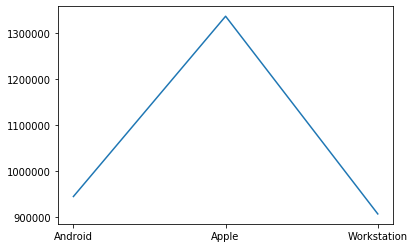

In [45]:
import operator

s = set(data['Client.8'])

cnt = dict()

cnt['Android'] = 0 
cnt['Apple'] = 0 
cnt['Workstation'] = 0

for t in data['Client.8']: 
    if 'Workstation' in t: 
        cnt['Workstation'] = cnt['Workstation']+1
    elif'Apple' in t or 'iPad' in t or 'iPhone' in t : 
        cnt['Apple'] = cnt['Apple']+1 
    else : 
        cnt['Android'] = cnt['Android']+1

#정렬

#scnt = sorted(cnt.items(), key=operator.itemgetter(1), reverse=True)

dkeys = [] 
dvalues = []

for key,value in cnt.items(): 
    dkeys.append(key) 
    dvalues.append(value)

print(dvalues)
plt.plot(dkeys, dvalues)
#Apple 관련 제품이 많다, 실제로 Workstation 도 Linux가 대부분

# 실제 기기 타입별 사용자 수 

In [89]:
s = []
#for idx, val in enumerate(data['Client.1']):    
#    s.append(str(data['Client.8'][idx])+str(val))
for idx, val in data[['Client.1', 'Client.8']].iterrows():
    s.append(str(val['Client.1'])+ str(val['Client.8']))


74986


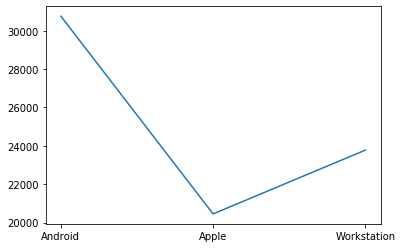

In [90]:
ss = set(s)
print(len(ss))
cnt = dict()

cnt['Android'] = 0 
cnt['Apple'] = 0 
cnt['Workstation'] = 0

for t in ss: 
    if 'Workstation' in t: 
        cnt['Workstation'] = cnt['Workstation']+1
    elif'Apple' in t or 'iPad' in t or 'iPhone' in t : 
        cnt['Apple'] = cnt['Apple']+1 
    else : 
        cnt['Android'] = cnt['Android']+1


dkeys = [] 
dvalues = []

for key,value in cnt.items(): 
    dkeys.append(key) 
    dvalues.append(value)    
   
plt.plot(dkeys, dvalues)

#실제 기기수는 Apple 제품이 가장 적은 것으로 나옴.  #동일 맥 라벨인데 End Point가 다른 경우가 있음 - Why?
#실제 맥라벨의 개수는 51597여개지만 <맥, End Point> 조합은 74986개


# 건물 별 Client의 기기 종류 

In [25]:
s = data['Client.1'].drop_duplicates()



48852

In [16]:
data[['Client.1', 'Client.8']][:1100]

,Client.1,Client.8
0,MAC Address,Endpoint Type
1,0,Linux-Workstation
2,1,"iPad11,3"
3,2,Linux-Workstation
4,2,Linux-Workstation
5,2,Linux-Workstation
6,3,Linux-Workstation
7,3,Linux-Workstation
8,3,Linux-Workstation
9,3,Linux-Workstation
